Maksym Lesyk

## Introduction

The dataset consists of 14 columns with 100000 observations. The goal is to predict whether the item sold was returned or not based on the set of the features provided. We will firstly look into the data to better understand its structure, then clean it in a way that should facilitate the model accuracy (that is excluding the NAs and eliminating possible outliers). Then we will split the dataset into two subsets and train the model.

Let us start by importing the datest and looking into it more closely.

##EDA/ Data preparation

First, import the dataset from the github depository and check the data on its structure.

In [ ]:
import pandas as pd

# the dataset was imported to the github depository for easier access
data_url = 'https://raw.githubusercontent.com/simbar27/hello_world/master/BADS_WS2021_known.csv'
df = pd.read_csv(data_url)
df

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,20,blue,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99996,99997,2016-09-11,2016-09-12,156,20,brown,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99997,99998,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0
99998,99999,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0


In [ ]:
df.head(n=6)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
5,6,2016-06-22,2016-06-27,579,xxl,grey,3,19.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1


In [ ]:
df.describe(include='all')

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
count,100000.000000,100000,90682,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000,91275,100000,100000,100000.000000
unique,NaN,82,123,NaN,102,77,NaN,NaN,NaN,5,9247,16,573,NaN
top,NaN,2016-06-27,2016-07-03,NaN,l,black,NaN,NaN,NaN,Mrs,1900-11-21,North Rhine-Westphalia,2015-02-17,NaN
freq,NaN,5577,5061,NaN,12347,18640,NaN,NaN,NaN,95429,919,22825,33966,NaN
mean,50000.500000,NaN,NaN,923.781820,NaN,NaN,30.149020,65.064695,27169.073960,NaN,NaN,NaN,NaN,0.458180
std,28867.657797,NaN,NaN,702.568822,NaN,NaN,28.180191,47.991546,14053.417669,NaN,NaN,NaN,NaN,0.498251
min,1.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,0.000000,9.000000,NaN,NaN,NaN,NaN,0.000000
25%,25000.750000,NaN,NaN,214.000000,NaN,NaN,5.000000,29.900000,14937.000000,NaN,NaN,NaN,NaN,0.000000
50%,50000.500000,NaN,NaN,812.000000,NaN,NaN,25.000000,49.900000,31189.000000,NaN,NaN,NaN,NaN,0.000000
75%,75000.250000,NaN,NaN,1581.000000,NaN,NaN,44.000000,79.900000,38917.250000,NaN,NaN,NaN,NaN,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_item_id  100000 non-null  int64  
 1   order_date     100000 non-null  object 
 2   delivery_date  90682 non-null   object 
 3   item_id        100000 non-null  int64  
 4   item_size      100000 non-null  object 
 5   item_color     100000 non-null  object 
 6   brand_id       100000 non-null  int64  
 7   item_price     100000 non-null  float64
 8   user_id        100000 non-null  int64  
 9   user_title     100000 non-null  object 
 10  user_dob       91275 non-null   object 
 11  user_state     100000 non-null  object 
 12  user_reg_date  100000 non-null  object 
 13  return         100000 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 10.7+ MB


There are two columns with NAs. Also most of types are not defined. The NAs are found in the columns that are supposed to represent the dates, which is however, not clear yet.

I consider the date-type objects to be inessential for usage in the model itself, nevertheless, these can be used to derive new variables that may be useful for the model.



### Time of delivery

Let us start by computing the time it took for a good to be delivered. These will be done by finding the difference between the delivery and order dates. Also, the columns have to be converted to datetime types.

In [ ]:
# convert the date-like objects the actual date format
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format='%Y-%m-%d')
df['user_reg_date'] = pd.to_datetime(df['user_reg_date'], format='%Y-%m-%d')

# find the difference which is supposed to represent the time of delivery
df["difference"]=df["delivery_date"]-df["order_date"]
df["difference"]


0           5 days
1              NaT
2           5 days
3           5 days
4           5 days
           ...    
99995       1 days
99996       1 days
99997   -7925 days
99998   -7925 days
99999      27 days
Name: difference, Length: 100000, dtype: timedelta64[ns]

As we can see even now, there are some mistakes in the data of the dataset, as it is impossible for the difference to be a negative number. Also, there some NAs to deal with.

Let us split the dataset into two subsets based on the presense of NAs. Also, the timedelta object will be converted to the integer32 type.

In [ ]:
# split the data into the part with NAs and without
df_na = df[df['difference'].isna()]
df = df[df['difference'].notna()]

# convert the timedelta to integer
df['difference'] = df['difference'].dt.days.astype('int32')
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,difference
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.9,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,5
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.9,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,5
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.9,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,5
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.9,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,5
5,6,2016-06-22,2016-06-27,579,xxl,grey,3,19.9,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,20,blue,34,29.9,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,1
99996,99997,2016-09-11,2016-09-12,156,20,brown,34,29.9,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,1
99997,99998,2016-09-11,1994-12-31,1832,xxl,black,37,26.9,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,-7925
99998,99999,2016-09-11,1994-12-31,1832,xxl,black,37,26.9,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,-7925


Where the difference is negative a mean number is calculated. Also, as we can see from the boxplot below and judging by the max variable, there are no possible positive outliers that could affect the mean, as I consider the delivery of 173 days (5-6 months) to be a quite reasonable number.

In [ ]:
df["difference"].max()

173

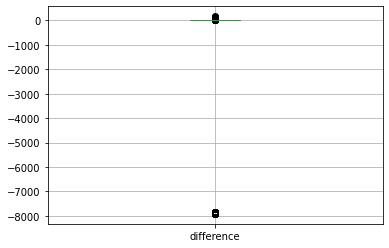

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.boxplot(["difference"])

The calculated mean is 7 days (a week). Which seems to be in line with what could be expected.

In [ ]:
# mean is calculated only on the basis of positive numbers
mean_delivery = df.loc[df['difference']>0, 'difference'].mean()
mean_delivery=int(mean_delivery)
mean_delivery

7

Let us add the NAs back and substitute them together with the negative numbers, which is once again not reasonable, with the mean.

In [ ]:
df=df.append(df_na)

In [ ]:
# substitution of negative differences and filling of NAs
df.loc[df['difference']<0, 'difference']=mean_delivery
df['difference'] = df['difference'].fillna(mean_delivery)


The boxplot for the difference in days now seems to be ok.

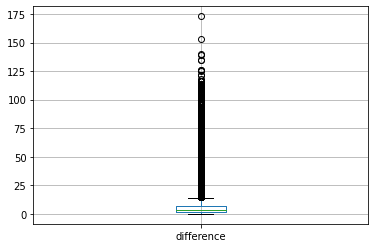

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.boxplot(["difference"])

I will also now compute the delivery date for NAs by adding the mean delivery time to the order date.

In [ ]:
df_na = df[df['delivery_date'].isna()]
df = df[df['delivery_date'].notna()]
df_na



,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,difference
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,7
55,56,2016-06-23,NaT,5,l,white,5,69.90,30828,Mrs,1966-05-13,Lower Saxony,2016-01-21,0,7
63,64,2016-06-23,NaT,211,40,turquoise,1,69.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,7
64,65,2016-06-23,NaT,55,40,purple,1,89.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,7
65,66,2016-06-23,NaT,74,40,pink,24,69.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99952,99953,2016-09-11,NaT,1508,42,dark denim,113,59.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,7
99953,99954,2016-09-11,NaT,1498,42,green,6,59.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,7
99954,99955,2016-09-11,NaT,1412,40,blue,54,119.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,7
99961,99962,2016-09-11,NaT,1550,xxl,berry,117,129.90,48236,Mrs,1964-10-15,North Rhine-Westphalia,2016-09-12,0,7


In [ ]:
import datetime

# adding the 7 days timedelta to the order date to showcase the mean delivery time, where the data was NA
df_na["delivery_date"] = pd.to_datetime(df_na['order_date']) + pd.DateOffset(days=7)
df_na

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,difference
1,2,2016-06-22,2016-06-29,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,7
55,56,2016-06-23,2016-06-30,5,l,white,5,69.90,30828,Mrs,1966-05-13,Lower Saxony,2016-01-21,0,7
63,64,2016-06-23,2016-06-30,211,40,turquoise,1,69.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,7
64,65,2016-06-23,2016-06-30,55,40,purple,1,89.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,7
65,66,2016-06-23,2016-06-30,74,40,pink,24,69.90,22948,Mrs,1957-03-11,Baden-Wuerttemberg,2015-02-17,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99952,99953,2016-09-11,2016-09-18,1508,42,dark denim,113,59.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,7
99953,99954,2016-09-11,2016-09-18,1498,42,green,6,59.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,7
99954,99955,2016-09-11,2016-09-18,1412,40,blue,54,119.90,48234,Mrs,1962-10-02,Hesse,2016-09-12,0,7
99961,99962,2016-09-11,2016-09-18,1550,xxl,berry,117,129.90,48236,Mrs,1964-10-15,North Rhine-Westphalia,2016-09-12,0,7


The updated variables are added back to the varibles that seemed to be ok with the expectations. As we can see below, the only column left with NAs is the one denoting the users' dates of birth.

In [ ]:
df=df.append(df_na)
pd.isna(df).sum()

order_item_id       0
order_date          0
delivery_date       0
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_title          0
user_dob         8725
user_state          0
user_reg_date       0
return              0
difference          0
dtype: int64

Let us change the column name to a more suitable one.

In [ ]:
df["Time of delivery"]=df["difference"]


### Age

Next, I will calculate users age at the time of delivery. There are several NA observations. NAs and negative numbers are to be substituted by the mean. The number of days is found, which is later divided by the mean Gregorian year of 365.2425 days.

In [ ]:
df['user_dob'] = pd.to_datetime(df['user_dob'], format='%Y-%m-%d')

df["difference"]=df["order_date"]-df["user_dob"]

df_na = df[df['difference'].isna()]
df = df[df['difference'].notna()]

df['difference'] = df['difference'].dt.days.astype('int32')

mean_age = df.loc[df['difference']>0, 'difference'].mean()
x=int(mean_age)

# the difference is in days and is to be divided by the mean Gregorian year to find the approximate
# age of the customers' at the of the delivery
mean_age


19106.913503149823

In [ ]:
# substitute NAs and negative numbers with the mean and divide the Age column by the Gregorian year
df=df.append(df_na)
df['difference'] = df['difference'].fillna(mean_age)
df.loc[df['difference']<0, 'difference']=mean_age
df["Age"]=df['difference']/365.2425

# convert the timedelta to integer
df["Age"]=df["Age"].astype("int32")
del df["difference"]
df

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,Time of delivery,Age
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,5,47
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,5,46
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,5,46
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,5,46
5,6,2016-06-22,2016-06-27,579,xxl,grey,3,19.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,5,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99399,99400,2016-09-10,2016-09-17,1937,9+,anthracite,21,109.95,31140,Mrs,NaT,Brandenburg,2016-06-25,0,7,52
99400,99401,2016-09-10,2016-09-17,1568,37,red,23,149.90,31140,Mrs,NaT,Brandenburg,2016-06-25,0,7,52
99401,99402,2016-09-10,2016-09-17,1568,38,red,23,149.90,31140,Mrs,NaT,Brandenburg,2016-06-25,0,7,52
99681,99682,2016-09-10,2016-09-17,105,41,grey,45,69.90,48181,Mrs,NaT,Hamburg,2016-09-11,0,7,52


It seems like there is a possible oulier, where the child of the of 4 is pointed out as the user. However, the number of observations is small and the overall Age group is within reasonable limits.

In [ ]:
df['Age'].value_counts()

52     13241
48      4462
49      4391
50      4391
53      4339
       ...  
4          3
86         2
19         1
103        1
113        1
Name: Age, Length: 82, dtype: int64

In [ ]:
print(df['Age'].min(), df['Age'].max(), sep="\n\n")

4

115


### Number of days registered and coversion to appropriate types

Let us next calculate in the same manner the number of months the user was registered with the shop. This may be useful as it shows how long the user might have used the shop's services. My reasoning is that this may be related to a higher level of loyalty, thus prompting a loyal user not to return the item and vice versa.

In [ ]:
df['user_reg_date'] = pd.to_datetime(df['user_reg_date'], format='%Y-%m-%d')

df["difference"]=df["order_date"]-df["user_reg_date"]

df['difference'] = df['difference'].dt.days.astype('int32')

# the number of days is divided by 30 days to find the total number of months during which the user was registered
df["Months registered"]=df['difference']/30
df["Months registered"]=df["Months registered"].astype("int32")
del df["difference"]


Let us then convert the variables to the most appropriate categories.

In [ ]:
df['item_color']=df['item_color'].astype("category")
df['user_state']=df['user_state'].astype("category")
df['user_title']=df['user_title'].astype("category")
df['return'] = df['return'].astype('bool')
num_vars = df.select_dtypes(include="int64").columns
df[num_vars] = df[num_vars].astype("int32")
df["item_price"]=df["item_price"].astype("float32")

And delete the unnecessary one.

In [ ]:
del df["user_dob"]

As we can see all the NAs were filled out. However, the is one more variable that needs to be cleaned, it being the size of an item.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99701
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_item_id      100000 non-null  int32         
 1   order_date         100000 non-null  datetime64[ns]
 2   delivery_date      100000 non-null  datetime64[ns]
 3   item_id            100000 non-null  int32         
 4   item_size          100000 non-null  object        
 5   item_color         100000 non-null  category      
 6   brand_id           100000 non-null  int32         
 7   item_price         100000 non-null  float32       
 8   user_id            100000 non-null  int32         
 9   user_title         100000 non-null  category      
 10  user_state         100000 non-null  category      
 11  user_reg_date      100000 non-null  datetime64[ns]
 12  return             100000 non-null  bool          
 13  Time of delivery   100000 non-null  int32    

### Size

In [ ]:
# as we can see the size column is a mix of categorical and numerical entries, as well as some numbers with a plus
df['item_size'].value_counts()

l       12347
xl      10979
m       10190
xxl      8966
40       7693
        ...  
84          1
12+         1
105         1
3132        1
49          1
Name: item_size, Length: 102, dtype: int64

Let us split the dataset subject to the size being shown categorically or numerically via using some regular expressions.

In [ ]:
# creating a subset with categorical values only
df_with_string_sizes=df[df["item_size"].str.contains('[a-z]', regex=True)]
df_with_string_sizes['item_size'].value_counts()

l          12347
xl         10979
m          10190
xxl         8966
unsized     5223
s           3949
xxxl          86
xs            35
Name: item_size, dtype: int64

In [ ]:
# creating a subset with string values only
df_with_numerical_sizes=df[df["item_size"].str.contains('[0-9]', regex=True)]
print(df_with_numerical_sizes['item_size'].value_counts().sum())
print(df_with_numerical_sizes["item_size"].max())

48225
90


In [ ]:
# is is also appropriate to subset the numerical set into the one that contains + and the one that does not
dfplus=df_with_numerical_sizes[df_with_numerical_sizes["item_size"].str.contains('\\+', regex=True)]
dfplus

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,user_reg_date,return,Time of delivery,Age,Months registered
23,24,2016-06-23,2016-06-26,1378,8+,black,17,99.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3
39,40,2016-06-23,2016-06-26,780,40+,brown,1,99.900002,30826,Mrs,Baden-Wuerttemberg,2015-02-17,True,3,52,16
60,61,2016-06-23,2016-06-26,484,6+,ecru,19,59.900002,22948,Mrs,Baden-Wuerttemberg,2015-02-17,True,3,59,16
116,117,2016-06-23,2016-06-27,126,6+,black,21,79.949997,30837,Mrs,Bavaria,2016-06-24,True,4,53,0
160,161,2016-06-23,2016-06-26,27,7+,black,19,39.900002,22533,Mrs,Schleswig-Holstein,2015-08-08,True,3,65,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48332,48333,2016-08-02,2016-08-09,1694,5+,black,12,130.000000,38899,Mrs,Schleswig-Holstein,2016-01-16,False,7,52,6
59206,59207,2016-08-08,2016-08-15,706,9+,black,19,69.900002,40961,Mr,Baden-Wuerttemberg,2016-08-09,False,7,52,0
62980,62981,2016-08-10,2016-08-17,1688,40+,blue,1,139.899994,40439,Mrs,Hesse,2016-03-21,False,7,52,4
85739,85740,2016-08-29,2016-09-05,1747,38+,brown,1,144.899994,24978,Mrs,North Rhine-Westphalia,2015-02-17,False,7,52,18


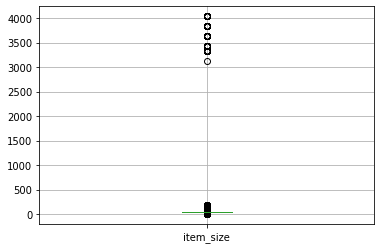

In [ ]:
# drop the items with + sizes from the main numerical subset
df_with_numerical_sizes = df_with_numerical_sizes[~df_with_numerical_sizes.order_item_id.isin(dfplus.order_item_id)]

# convert numerical sizes to the integer type
df_with_numerical_sizes["item_size"]=df_with_numerical_sizes["item_size"].astype("int32")

# create a boxplot for the numerical varibles to check the distribution
df_with_numerical_sizes.boxplot(["item_size"])

In [ ]:
df_with_numerical_sizes.loc[df_with_numerical_sizes["item_size"]>200, ["item_size"]].count()

item_size    93
dtype: int64

As we can see above, the remaining numerical have some outiers that lie in the area of 4-digits, however their number is relatively small, cinstituting only 93 items out of 100,000, thus it may be more convenient to substitute it with the most convenient string size "l".

In [ ]:
# subsetting sizes over the reasonable threshold of 200, as determined by the distribution of the boxplot
oversized=df_with_numerical_sizes.loc[df_with_numerical_sizes["item_size"]>200]

# dropping the "oversized" subset from the main numerical subset
df_with_numerical_sizes = df_with_numerical_sizes[~df_with_numerical_sizes.order_item_id.isin(oversized.order_item_id)]

In [ ]:
# converting all the variables in the oversized subset to the "l" size
oversized["item_size"]="l"

# appending the converted subset to the string subset
df_with_string_sizes=df_with_string_sizes.append(oversized)

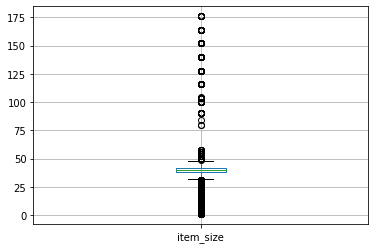

In [ ]:
# see that there are no remaining outliers
df_with_numerical_sizes.boxplot(["item_size"])

In [ ]:
# let us inspect the sizes with pluses
dfplus["item_size"].value_counts()

6+     436
7+     328
5+     253
8+     247
39+    211
9+     191
40+    187
10+    175
38+    160
42+    123
41+    106
4+      93
37+     75
11+     23
36+     22
43+     17
46+     14
3+      13
44+     10
45+      8
2+       2
12+      1
Name: item_size, dtype: int64

Whereas, it is impossible to know, from my perspective, which of the items were sold (jeans, hats etc.) I will delete the pluses, so that the sizes with + could be read as fully numerical.

In [ ]:
# delete the pluses
dfplus["item_size"]=dfplus["item_size"].str[:-1]

# append the sizes with pluses to the main numerical size subset
df_with_numerical_sizes=df_with_numerical_sizes.append(dfplus)

df_with_numerical_sizes

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,user_reg_date,return,Time of delivery,Age,Months registered
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.900002,30822,Mrs,Saxony,2016-06-23,False,5,47,0
6,7,2016-06-22,2016-06-27,72,41,grey,1,119.900002,30823,Mrs,Baden-Wuerttemberg,2015-03-15,False,5,46,15
7,8,2016-06-22,2016-06-27,106,50,white,6,39.900002,30823,Mrs,Baden-Wuerttemberg,2015-03-15,True,5,46,15
15,16,2016-06-23,2016-06-26,797,48,brown,6,69.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3
20,21,2016-06-23,2016-06-26,734,42,blue,24,69.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48332,48333,2016-08-02,2016-08-09,1694,5,black,12,130.000000,38899,Mrs,Schleswig-Holstein,2016-01-16,False,7,52,6
59206,59207,2016-08-08,2016-08-15,706,9,black,19,69.900002,40961,Mr,Baden-Wuerttemberg,2016-08-09,False,7,52,0
62980,62981,2016-08-10,2016-08-17,1688,40,blue,1,139.899994,40439,Mrs,Hesse,2016-03-21,False,7,52,4
85739,85740,2016-08-29,2016-09-05,1747,38,brown,1,144.899994,24978,Mrs,North Rhine-Westphalia,2015-02-17,False,7,52,18


As can be observed below, the data of string sizes is normally distributed, with the mean of "l" being the most common and the smallest "xs" and the largest "xxxl" being the least common. Taking this into consideration, I consider it to be reasonable, that numerical values, which roughly represent the half of the total population, are also normally distributed. I will substitute numerical sizes, based on this information, with their string counterparties, taken, once again, that it is impossible to know for sure the categories (pants, dresses etc.) of the goods sold.

In [ ]:
df_with_string_sizes["item_size"].value_counts()

l          12440
xl         10979
m          10190
xxl         8966
unsized     5223
s           3949
xxxl          86
xs            35
Name: item_size, dtype: int64

In [ ]:
# let us get rid of the outliers using the outlier truncation function to normalize the data

def outlier_truncation(x, factor=1.5):
    x_new = x.copy()

    # Calculate IQR
    IQR = x.quantile(0.75) - x.quantile(0.25)

    # Define upper/lower bound
    upper = x.quantile(0.75) + factor*IQR
    lower = x.quantile(0.25) - factor*IQR

    # Truncation
    x_new[x < lower] = lower
    x_new[x > upper] = upper

    return x_new

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6cd3a9990>]],
      dtype=object)

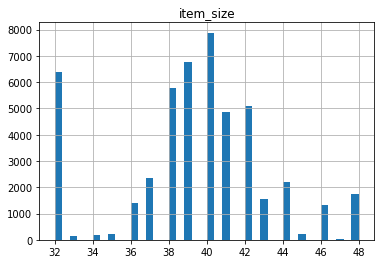

In [ ]:
# apply the function
df_with_numerical_sizes["item_size"]=df_with_numerical_sizes["item_size"].astype("int32")
df_with_numerical_sizes["item_size"]=outlier_truncation(df_with_numerical_sizes["item_size"], factor=1.5)
df_with_numerical_sizes.hist("item_size", bins = 40)

Next, I will carry out the substitution of the numerical variables with the appropriate strings.

In [ ]:
# create a proxy to refer to during the substitution
df_with_numerical_sizes["item_size_proxy"]=df_with_numerical_sizes["item_size"]
df_with_numerical_sizes

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,user_reg_date,return,Time of delivery,Age,Months registered,item_size_proxy
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.900002,30822,Mrs,Saxony,2016-06-23,False,5,47,0,38
6,7,2016-06-22,2016-06-27,72,41,grey,1,119.900002,30823,Mrs,Baden-Wuerttemberg,2015-03-15,False,5,46,15,41
7,8,2016-06-22,2016-06-27,106,48,white,6,39.900002,30823,Mrs,Baden-Wuerttemberg,2015-03-15,True,5,46,15,48
15,16,2016-06-23,2016-06-26,797,48,brown,6,69.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3,48
20,21,2016-06-23,2016-06-26,734,42,blue,24,69.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48332,48333,2016-08-02,2016-08-09,1694,32,black,12,130.000000,38899,Mrs,Schleswig-Holstein,2016-01-16,False,7,52,6,32
59206,59207,2016-08-08,2016-08-15,706,32,black,19,69.900002,40961,Mr,Baden-Wuerttemberg,2016-08-09,False,7,52,0,32
62980,62981,2016-08-10,2016-08-17,1688,40,blue,1,139.899994,40439,Mrs,Hesse,2016-03-21,False,7,52,4,40
85739,85740,2016-08-29,2016-09-05,1747,38,brown,1,144.899994,24978,Mrs,North Rhine-Westphalia,2015-02-17,False,7,52,18,38


In [ ]:
# use the numpy.where function to set conditions for the substitution. The thresholds are based on the above normalized distribution form roughly 32
# to 48 divided by the most common classes from s to xxxl
df_with_numerical_sizes['item_size'] = np.where(df_with_numerical_sizes['item_size_proxy'] >=30, "s", df_with_numerical_sizes['item_size'])
df_with_numerical_sizes['item_size'] = np.where(df_with_numerical_sizes['item_size_proxy'] >=35, "m", df_with_numerical_sizes['item_size'])
df_with_numerical_sizes['item_size'] = np.where(df_with_numerical_sizes['item_size_proxy'] >=38, "l", df_with_numerical_sizes['item_size'])
df_with_numerical_sizes['item_size'] = np.where(df_with_numerical_sizes['item_size_proxy'] >=41, "xl", df_with_numerical_sizes['item_size'])
df_with_numerical_sizes['item_size'] = np.where(df_with_numerical_sizes['item_size_proxy'] >=44, "xxl", df_with_numerical_sizes['item_size'])
df_with_numerical_sizes['item_size'] = np.where(df_with_numerical_sizes['item_size_proxy'] >=47, "xxxl", df_with_numerical_sizes['item_size'])
del df_with_numerical_sizes['item_size_proxy']
df_with_numerical_sizes

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,user_reg_date,return,Time of delivery,Age,Months registered
0,1,2016-06-22,2016-06-27,643,l,navy,30,49.900002,30822,Mrs,Saxony,2016-06-23,False,5,47,0
6,7,2016-06-22,2016-06-27,72,xl,grey,1,119.900002,30823,Mrs,Baden-Wuerttemberg,2015-03-15,False,5,46,15
7,8,2016-06-22,2016-06-27,106,xxxl,white,6,39.900002,30823,Mrs,Baden-Wuerttemberg,2015-03-15,True,5,46,15
15,16,2016-06-23,2016-06-26,797,xxxl,brown,6,69.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3
20,21,2016-06-23,2016-06-26,734,xl,blue,24,69.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48332,48333,2016-08-02,2016-08-09,1694,s,black,12,130.000000,38899,Mrs,Schleswig-Holstein,2016-01-16,False,7,52,6
59206,59207,2016-08-08,2016-08-15,706,s,black,19,69.900002,40961,Mr,Baden-Wuerttemberg,2016-08-09,False,7,52,0
62980,62981,2016-08-10,2016-08-17,1688,l,blue,1,139.899994,40439,Mrs,Hesse,2016-03-21,False,7,52,4
85739,85740,2016-08-29,2016-09-05,1747,l,brown,1,144.899994,24978,Mrs,North Rhine-Westphalia,2015-02-17,False,7,52,18


In [ ]:
# join the two chunks of the data together
df_with_numerical_sizes=df_with_numerical_sizes.append(df_with_string_sizes)
df=df_with_numerical_sizes
df

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_state,user_reg_date,return,Time of delivery,Age,Months registered
0,1,2016-06-22,2016-06-27,643,l,navy,30,49.900002,30822,Mrs,Saxony,2016-06-23,False,5,47,0
6,7,2016-06-22,2016-06-27,72,xl,grey,1,119.900002,30823,Mrs,Baden-Wuerttemberg,2015-03-15,False,5,46,15
7,8,2016-06-22,2016-06-27,106,xxxl,white,6,39.900002,30823,Mrs,Baden-Wuerttemberg,2015-03-15,True,5,46,15
15,16,2016-06-23,2016-06-26,797,xxxl,brown,6,69.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3
20,21,2016-06-23,2016-06-26,734,xl,blue,24,69.900002,9392,Mrs,North Rhine-Westphalia,2016-03-24,True,3,54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69512,69513,2016-08-14,2016-09-26,2118,l,brown,39,89.900002,42822,Mr,Bavaria,2016-08-15,False,43,52,0
69892,69893,2016-08-15,2016-08-17,2106,l,dark denim,39,89.900002,42900,Mr,Lower Saxony,2016-08-16,False,2,52,0
74582,74583,2016-08-19,2016-09-26,2118,l,beige,39,89.900002,43709,Mr,Schleswig-Holstein,2016-08-20,True,38,52,0
75331,75332,2016-08-20,2016-08-21,2106,l,denim,39,89.900002,40348,Mr,Rhineland-Palatinate,2016-08-07,False,1,52,0


In [ ]:
# see that only strings are left
df['item_size'].value_counts()


l          32838
xl         22461
m          14183
xxl        12742
s          10656
unsized     5223
xxxl        1862
xs            35
Name: item_size, dtype: int64

In [ ]:
# again check the types of the variables
df["item_size"]=df["item_size"].astype("category")
df.info()
df=df.sort_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 79030
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_item_id      100000 non-null  int32         
 1   order_date         100000 non-null  datetime64[ns]
 2   delivery_date      100000 non-null  datetime64[ns]
 3   item_id            100000 non-null  int32         
 4   item_size          100000 non-null  category      
 5   item_color         100000 non-null  category      
 6   brand_id           100000 non-null  int32         
 7   item_price         100000 non-null  float32       
 8   user_id            100000 non-null  int32         
 9   user_title         100000 non-null  category      
 10  user_state         100000 non-null  category      
 11  user_reg_date      100000 non-null  datetime64[ns]
 12  return             100000 non-null  bool          
 13  Time of delivery   100000 non-null  int32    

In [ ]:
# delete unnecessary columns
del df["order_date"]
del df["delivery_date"]
del df["user_reg_date"]
del df["item_id"]
del df["brand_id"]
del df["user_id"]
del df["order_item_id"]

### Additional inspection

Let us inspect the dataset a bit more after the cleaning process by producing relevant graphs and correlation.

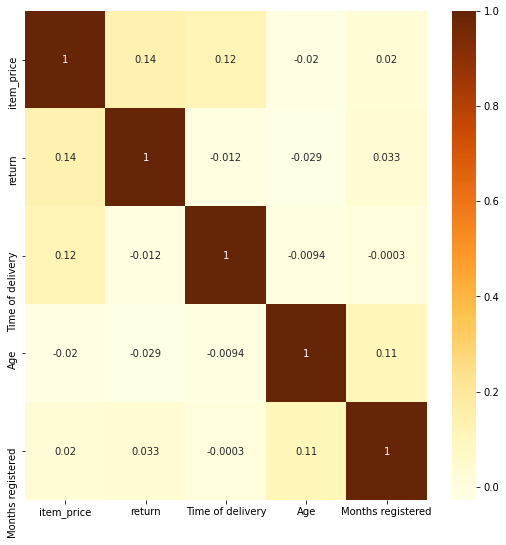

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(9, 9))
full_data = df

corr = full_data.corr(method="pearson")

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap="YlOrBr");

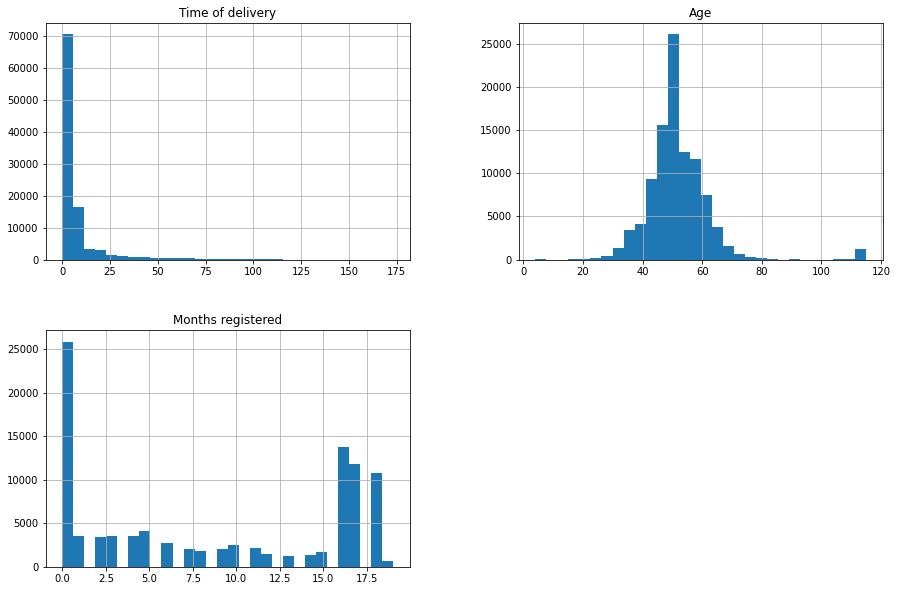

In [ ]:
df.select_dtypes(include='int32').hist(bins=30, figsize=(15, 10));

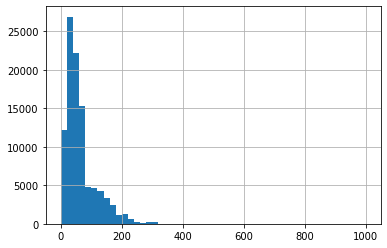

In [ ]:
df["item_price"].hist(bins=50)

Out of all of the essential for the model numerical columns, only Age seems to be normally distributed.

Time of delivery and price are skewed to the left, which is expected, as most of the goods take, as was figured out, up to a week to be delivered and the greatest chunk of goods was sold under 100 euros with the max price of less than 400 euros.

From the Months registred, it can be derived that most of the items sold come from either new or really old ,in terms of the time being registered, customers. However, new customers take up the greatest share.

The variables are so far, roughly slightly correlated with returns. The largest correlation is with the price of the item sold.

## Model tuning and selection

Next, let us start with the model selcetion and tuning.

In [ ]:
# first split the data with dependent and independent variables
y = df["return"]
x=df

In [ ]:
# check the shape
print(x.shape, y.shape)

# complete the split on the train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=888)

(100000, 9) (100000,)


I decided to use woe instead of dummies for categorical variables encoding to avoid future overfitting.

This will be done with the scorecardpy package.

In [ ]:
!pip install scorecardpy
import scorecardpy as sc

In [ ]:
# first check the informational value of each of the columns of the dataset subject to the prediction
# of the return column
sc.iv(x_train, y="return", x=['item_color', "user_title", "item_size", "user_state","Time of delivery", "item_price", "Age", "Months registered"])

,variable,info_value
4,Time of delivery,0.432332
5,item_price,0.175206
0,item_color,0.034743
2,item_size,0.032988
6,Age,0.024642
7,Months registered,0.015971
3,user_state,0.002059
1,user_title,0.001701


As can be seen from above, for the present state of the data title, state and months registered bear no significance for the prediction as they are below the threshold of 0.02. I decided to subsequently exclude them and to bin the remaining columns.

In [ ]:
bins_regression = sc.woebin(x_train, y="return", x=['item_color', "item_size", "Time of delivery", "item_price", "Age"])

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
item_color
>>> Continue the binning process?
1: yes 
2: no
Selection: 1


/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binning_1bst_brk['total_iv'] = iv_01(binning_1bst_brk.good, binning_1bst_brk.bad)
/usr/local/lib/python3.7/dist-packages/scorecardpy/woebin.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binning_1bst_brk['bstbrkp'] = [float(re.match("^\[(.*),.+", i).group(1)) for i in binning_1bst_brk['bstbin']]


Binning on 90000 rows and 6 columns in 00:00:49


In [ ]:
# scorecardpy binned numerical variables. It also performed binning for the numerical columns
bins_regression

{'Age':   variable          bin  count  ...  total_iv  breaks  is_special_values
 0      Age  [-inf,45.0)  17146  ...  0.010749    45.0              False
 1      Age  [45.0,51.0)  21851  ...  0.010749    51.0              False
 2      Age  [51.0,55.0)  23289  ...  0.010749    55.0              False
 3      Age   [55.0,inf)  27714  ...  0.010749     inf              False
 
 [4 rows x 12 columns],
 'Time of delivery':            variable         bin  count  ...  total_iv  breaks  is_special_values
 0  Time of delivery  [-inf,3.0)  32186  ...  0.423153     3.0              False
 1  Time of delivery   [3.0,7.0)  32650  ...  0.423153     7.0              False
 2  Time of delivery   [7.0,8.0)  10436  ...  0.423153     8.0              False
 3  Time of delivery   [8.0,inf)  14728  ...  0.423153     inf              False
 
 [4 rows x 12 columns],
 'item_color':      variable  ... is_special_values
 0  item_color  ...             False
 1  item_color  ...             False
 2  item_colo

In [ ]:
# substitute entries in the train and test subsets with the bins
x_woe_train = sc.woebin_ply(x_train, bins_regression)
x_woe_test = sc.woebin_ply(x_test, bins_regression)

[INFO] converting into woe values ...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[INFO] converting into woe values ...


In [ ]:
# see that the bins were applied to the subset
x_woe_train

,return,user_state,user_title,Months registered,Age_woe,Time of delivery_woe,item_size_woe,item_price_woe,item_color_woe
0,False,Saxony,Mrs,0,0.067757,0.288391,0.042700,-0.050224,-0.089459
1,False,Saxony,Mrs,0,0.067757,-2.200177,-0.032039,-0.409709,0.010523
2,True,Baden-Wuerttemberg,Mrs,15,0.067757,0.288391,-0.032039,0.291923,0.010523
3,False,Baden-Wuerttemberg,Mrs,15,0.067757,0.288391,-0.032039,0.291923,0.010523
4,True,Baden-Wuerttemberg,Mrs,15,0.067757,0.288391,-0.032039,-0.916623,0.010523
...,...,...,...,...,...,...,...,...,...
99995,False,Rhineland-Palatinate,Mrs,19,-0.131186,0.162586,0.042700,-0.409709,0.080077
99996,False,Rhineland-Palatinate,Mrs,19,-0.131186,0.162586,0.042700,-0.409709,0.080077
99997,False,Hamburg,Mr,0,0.149436,-2.200177,-0.032039,-0.409709,0.080077
99998,False,Hamburg,Mr,0,0.149436,-2.200177,-0.032039,-0.409709,0.080077


In [ ]:
# delete return from the subsets with independent variables
import statsmodels.api as sm
del x_woe_train["return"]
del x_woe_test["return"]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# delete unncessary columns
del x_woe_train["user_title"]
del x_woe_test["user_title"]
del x_woe_train["user_state"]
del x_woe_test["user_state"]
del x_woe_train["Months registered"]
del x_woe_test["Months registered"]

I decided to use logistic regression for the model due to its ease of implementation.

1. I expect there to be quite a lot of noise with the dataset
2. It is less prone to overfitting

In [ ]:
# train the model without pripr setting of the parameters
log_reg_woe = sm.Logit(y_train.sort_index(), x_woe_train.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.632901
         Iterations 6


In [ ]:
print(log_reg_woe.summary())

                           Logit Regression Results                           
Dep. Variable:                 return   No. Observations:                90000
Model:                          Logit   Df Residuals:                    89995
Method:                           MLE   Df Model:                            4
Date:                Fri, 30 Apr 2021   Pseudo R-squ.:                 0.08222
Time:                        21:09:43   Log-Likelihood:                -56961.
converged:                       True   LL-Null:                       -62064.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age_woe                  1.1364      0.068     16.645      0.000       1.003       1.270
Time of delivery_woe     0.9520      0.013     72.376      0.000       0.926       0.978
item_size_wo

The coefficients represent a reasonable amount of significance with a low standard error. Let us estimate auc.

In [ ]:
# predict y for the test subset
from sklearn.metrics import roc_auc_score
y_pred = log_reg_woe.predict(x_woe_test.astype(float))

In [ ]:
# calculate auc
import sklearn.metrics as metrics
fpr_logit, tpr_logit, thresholds = metrics.roc_curve(y_test.sort_index(), y_pred)
auc_logit = metrics.auc(fpr_logit, tpr_logit)
auc_logit

0.6720615896181976

Let us plot auc_roc curve for a graphical representation.

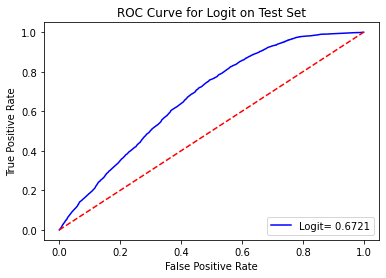

In [ ]:
#Plot of AUC
plt.plot(fpr_logit, tpr_logit, label="Logit= %0.4f" % auc_logit, color='b')

#Random benchmark
plt.plot([0, 1], [0, 1], "r--");

#Plot configuration
plt.title('ROC Curve for Logit on Test Set')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")
plt.show()

However, it is possile that the logistic regression does not use the most optimal parameters in its estimation. I will use Grid Search below to estimate the most appropriate tuning parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{'solver': ["lbfgs", "saga", "sag"],
                     'penalty': ["l1", "l2", "elasticnet"]}] # you could also take min_samples_split, max_features...

grid_search = GridSearchCV(
        LogisticRegression(),
        param_grid=tuned_parameters
        )
grid_search.fit(x_woe_train, y_train.sort_index())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mo

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'saga', 'sag']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# print optimal parameters
print(grid_search.best_params_)

{'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
# use the parameters to create a new model
log= LogisticRegression(penalty="l2", solver="lbfgs")
log.fit(x_woe_train.astype(float), y_train.sort_index())
log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# check auc score
yhat=log.predict_proba(x_woe_test)
yhat = yhat[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test.sort_index(), yhat)
auc_logit = metrics.auc(fpr, tpr)
auc_logit

0.6722083764614437

As we can see above, the auc score did not change that much. However, the parameters should be optimal.
Let us, however, calculate an optimal threshold to be used for model estimation and for the prediction of the unknown data to be submitted with this notebook.

In [ ]:
# calculate efficient threshold
print(thresholds[np.argmin((1 - tpr) ** 2 + fpr ** 2)])

0.49729490169236545


In [ ]:
# set a threshold as a delimiter between zeroes and ones
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
THRESHOLD = 0.4972949016923658
y_test=pd.DataFrame(y_test, columns = ['return'])

y_test["preds"] = log.predict_proba(x_woe_test)[:,1]
y_test["preds"] = np.where(y_test["preds"] > THRESHOLD, 1, 0)

In [ ]:
# check
y_test

,return,preds
77795,False,1
11189,True,0
84792,True,0
97619,False,0
79593,True,1
...,...,...
61582,True,1
580,True,1
3833,False,1
49093,True,1


## Model evaluation

Next, I will try to evaluate the model using a set of metrics.

Confusion matrix shows the distribution of exactly correcly predicted entries and incorrectly predicted ones.

In [ ]:
y_test["preds"]=y_test["preds"].astype("bool")
confusion_matrix = pd.crosstab(y_test["preds"], y_test["return"])
confusion_matrix

return,False,True
preds,,
False,2485,2068
True,2908,2539


Below the accuracy score may be seen, which is above 0.5

In [ ]:
accuracy_score(y_test["preds"], y_test["return"])

0.5024

In [ ]:
# let us join the predictions and the actual data into a single dataframe
x=df.loc[y_test.index]
x=x["item_price"]

In [ ]:
y_test=y_test.join(x)

Nest, I want to calculate the cost that will be potentially born by the shop due to incorrectly predicted returns.

In [ ]:
# create a function
def cost_function (row):
   if (row['return'] == False) & (row['preds'] == False) :
      return 0
   if (row['return'] == False) & (row['preds'] == True) :
      return row["item_price"]*0.5
   if (row['return'] == True) & (row['preds'] == True) :
      return 0
   if (row['return'] == True) & (row['preds'] == False) :
      return 0.5*5*(3+row["item_price"]*0.1)

In [ ]:
# apply the function to the dataset
y_test["cost"]=y_test.apply (lambda row: cost_function(row), axis=1)

In [ ]:
# check
y_test

,return,preds,item_price,cost
77795,False,True,39.900002,19.950001
11189,True,False,64.900002,23.725000
84792,True,False,59.900002,22.475000
97619,False,False,169.899994,0.000000
79593,True,True,114.900002,0.000000
...,...,...,...,...
61582,True,True,39.900002,0.000000
580,True,True,69.900002,0.000000
3833,False,True,24.900000,12.450000
49093,True,True,59.900002,0.000000


It is also possible to calculate potential earning versus the expenses to be born by the shop.

In [ ]:
earnings=y_test["item_price"].sum()
earnings

655390.56

In [ ]:
expenses=y_test["cost"].sum()
expenses

139300.52290427685

In [ ]:
print("Total earnings equal: ",round(earnings-expenses, ndigits=2))

Total earnings equal:  516090.04


## Conclusions

Overall, I would state that possibly the prediction model could have been created and tuned in a better way.

I am sure that the size variable could have been more significant had there been a clear understanding of what is the actual nature of the item sold. Nevertheless, I it is a real-world situation where not all of the data is available and a way around should be found.

There was a lot of noise in the dataset that prevented its efficient estimation.

However, I am glad with my results as the course encompassed plenty of information and I believe that I was able to grasp some of it.